**Анализ данных по клиентам с целью найти зависимости и предотвратить отток клиентов в банке**

In [108]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')

churn_data = churn_data.drop(['RowNumber'], axis=1)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


*9.1. Каково соотношение ушедших и лояльных клиентов?*

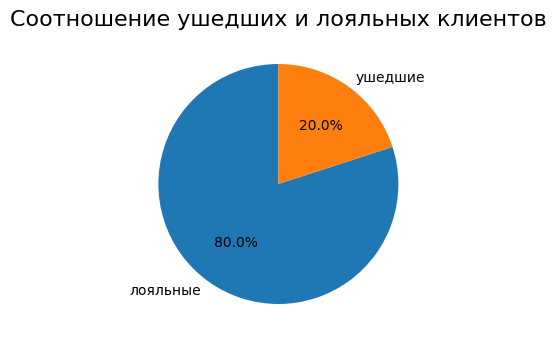

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

churn_data_Exited = churn_data['Exited'].value_counts(normalize=True).sort_values(ascending=False).round(1)

fig = plt.figure(figsize=(6, 3))
ax = fig.add_axes((1, 1, 1, 1))

pie = ax.pie(
    churn_data_Exited,
    labels=['лояльные', 'ушедшие'],
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Соотношение ушедших и лояльных клиентов', fontsize=16)
plt.show(pie)

*Вывод:* Ушедших клиентов в 4 раза меньше лояльных.

*9.2 Распределение баланса пользователей, у которых на счету больше 2 500 долларов*

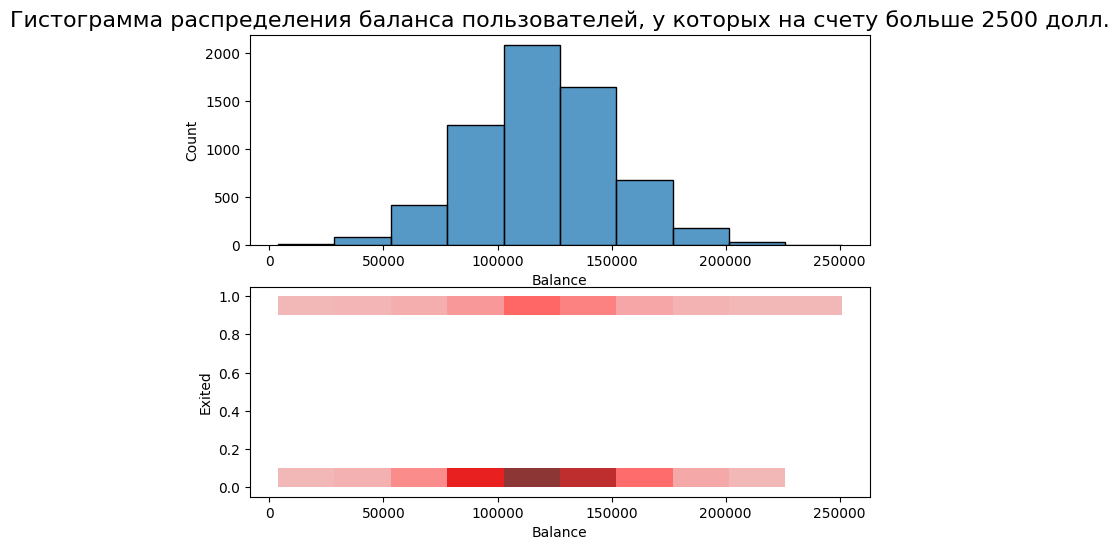

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

churn_data_bal = churn_data[churn_data['Balance'] > 2500]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
sns.histplot(
    data=churn_data_bal,
    x='Balance',
    bins=10,
    ax=axes[0]
);
axes[0].set_title('Гистограмма распределения баланса пользователей, у которых на счету больше 2500 долл.', fontsize=16)
sns.histplot(
    data=churn_data_bal,
    x='Balance',
    y='Exited',
    bins=10,
    color='red',
    ax=axes[1]
);


*Вывод:*
1. На графике виден диапозон распределения баланса от 2 500 долл. до 250 000 долл.(максимальное значение баланса пользователей).
2. Большинство клиентов банка имеет баланс от 100 000 долл. до 125 000 долл. Так как второе по модальности значение доходит до 150 000 долл., то можно сказать, что большинство значений в диапозоне 100 000-150 000.
3. По второму графику видно, что диапозон модальных значений у ушедших клиентов начинается от 100тыс., а у лояльных от 75 тыс.долл.

*9.3. Распределение баланса клиента в разрезе признака оттока.* <br>
*Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?*

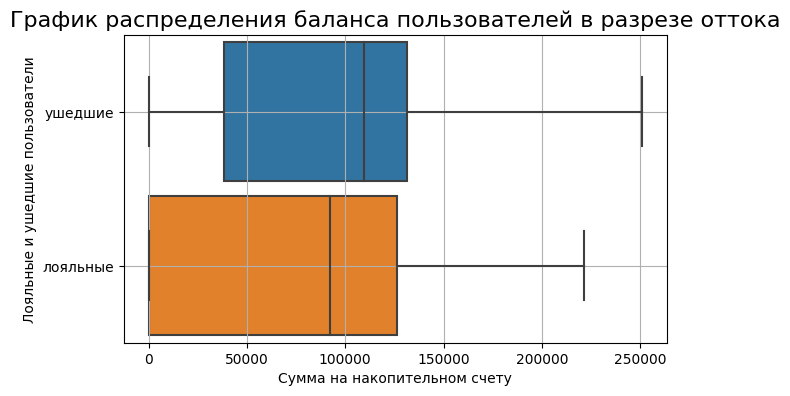

In [111]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')

churn_data = churn_data.drop(['RowNumber'], axis=1)

import seaborn as sns
import matplotlib.pyplot as plt

churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 'ушедшие' if x == 1 else 'лояльные')

fig = plt.figure(figsize=(7, 4))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('График распределения баланса пользователей в разрезе оттока', fontsize=16);
boxplot.set_xlabel('Сумма на накопительном счету');
boxplot.set_ylabel('Лояльные и ушедшие пользователи');
boxplot.grid()

*Выводы:* у ушедших клиентов межквартильный размах начинается с больших сумм, чем у лояльных (примерно с 40 000 долл.), и максимум больше (250 000 долл.) Медианное значение у ушедших клиентов больше, чем у лояльных.
Можно предположить, что у банка нет льготных условий для VIP-клиентов с большими суммами на накопительных счетах.
Межквартильный размах лояльных пользователей начинается с нуля, то есть у банка много пользователей с небольшими суммами на счетах.

**Мы видим большое смещение лояльных клиентов к нулю, это вызвано большим количеством клиентов с нулевым балансом. Стоит отдельно рассмотреть клиентов с нулевым балансом.**

*9.4. Распределение возраста в разрезе признака оттока.* <br>
*В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?*

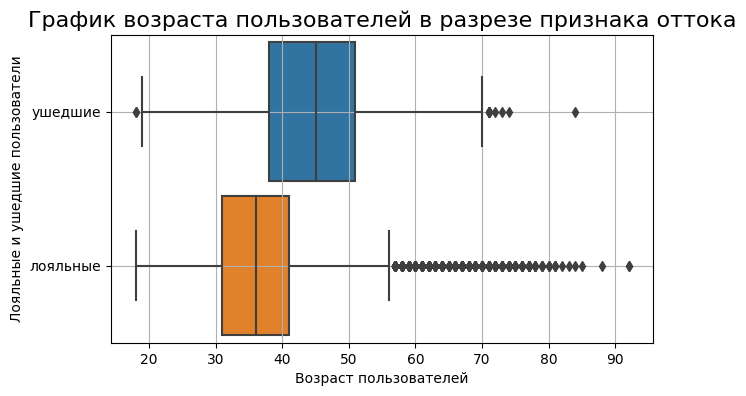

In [112]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')

churn_data = churn_data.drop(['RowNumber'], axis=1)

import seaborn as sns
import matplotlib.pyplot as plt

churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 'ушедшие' if x == 1 else 'лояльные')

fig = plt.figure(figsize=(7, 4))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('График возраста пользователей в разрезе признака оттока', fontsize=16);
boxplot.set_xlabel('Возраст пользователей');
boxplot.set_ylabel('Лояльные и ушедшие пользователи');
boxplot.grid()

*Выводы:* потенциальных выбросов больше у лояльных клиентов, после максимума в 55 лет.
Стоит обратить внимание, что основное количество лояльных клиентов в возрасте 30-40 лет . В то время как ушедшие клиенты старше (в основной массе), это 38-50 лет. Так же медианное значение лояльных клиентов (35) на 10 лет моложе, чем медианное значение возраста ушедших (45).
Можно обратить внимание на группу клиентов возраста 40 и старше.

*9.5. График, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.<br>
Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками?*

In [113]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')

churn_data = churn_data.drop(['RowNumber'], axis=1)

import plotly.express as px

churn_data['Exited'] = churn_data['Exited'].astype('category')
churn_data['Exited'] = churn_data['Exited'].cat.rename_categories({
    1 : 'Exited',
    0 : 'Loyal'
})

churn_data_sal_cred = churn_data.groupby(['CreditScore', 'Exited'], as_index=False)['EstimatedSalary'].mean()

fig = px.scatter(
    data_frame=churn_data_sal_cred,
    x = 'EstimatedSalary',
    y = 'CreditScore',
    color='Exited',
    width=700,
    height=300,
    title='Зависимость крединого рейтинга от предполагаемой заработной платы',
)

fig.show()


*Вывод:* по графику без группировки не видно взаимосвязи рейтинга и зарплаты.<br>
Группировка по рейтингу и средняя заработная плата дают возможность увидеть, что у лояльных клиентов разброс средних заработных плат не такой сильных, как у ушедших. Так же видно, что среди ушедших клиентов много клиентов с большой зароботной платой, но маленьким кредитным рейтингом.

**Можно отметить, что только у ушедших клиентов есть рейтинг ниже 400.**

*9.6. Кто чаще уходит, мужчины или женщины?*

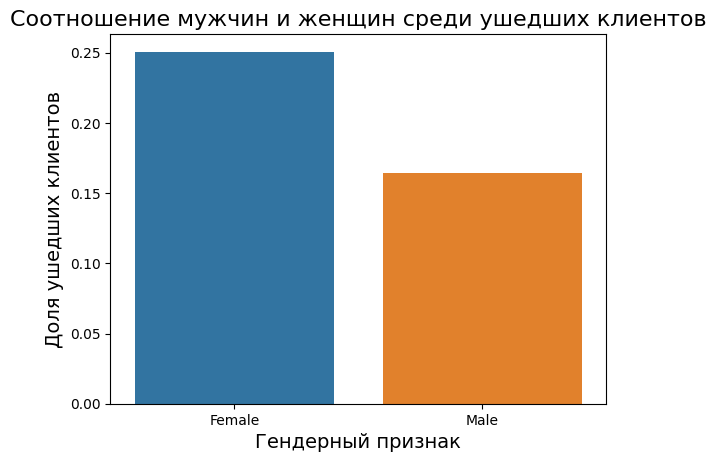

In [114]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')

churn_data = churn_data.drop(['RowNumber'], axis=1)

import seaborn as sns

churn_data_gender = churn_data.groupby(['Gender'], as_index=False)['Exited'].mean()

barplot = sns.barplot(
    data=churn_data_gender,
    x='Gender',
    y='Exited',
    orient='v',
)
barplot.set_title('Соотношение мужчин и женщин среди ушедших клиентов', fontsize=16);
barplot.set_ylabel('Доля ушедших клиентов', fontsize=14);
barplot.set_xlabel('Гендерный признак', fontsize=14);


#Возможный код:
gone = data[data['Exited'] == 'Ушедший']
fig, axes = plt.subplots(figsize=(9, 9))
axes.pie(
gone['Gender'].value_counts(), # берем данные об ушедших клиентах
labels=['Женщины', 'Мужчины'],
autopct='%.1f%%', #округление до первого знака после запятой
explode=[0.1, 0] #доля смещения от центра
)

*Вывод:* чаще уходят женщины.

**Можно было взять всех ушедших клиентов и посмотреть долю мужчин и женщин от всего 100% ушедших клиентов.**


*9.7. Как отток клиентов зависит от числа приобретённых у банка услуг?*

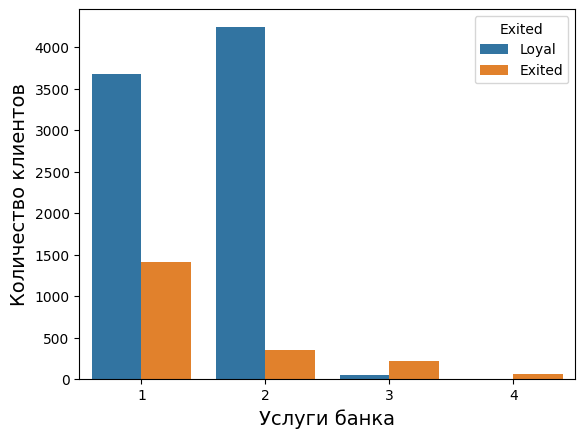

In [115]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')

churn_data = churn_data.drop(['RowNumber'], axis=1)

import seaborn as sns
import matplotlib.pyplot as plt

churn_data['Exited'] = churn_data['Exited'].astype('category')
churn_data['Exited'] = churn_data['Exited'].cat.rename_categories({
    1 : 'Exited',
    0 : 'Loyal'
})

grouped_row = churn_data.groupby(['NumOfProducts', 'Exited'], as_index=False)['CustomerId'].count()

barplot = sns.barplot(
    data=grouped_row,
    x='NumOfProducts',
    y='CustomerId',
    hue='Exited',
    orient='v'
)
barplot.set_xlabel('Услуги банка', fontsize=14);
barplot.set_ylabel('Количество клиентов', fontsize=14);


#pivot=churn_data.pivot_table(
#'CustomerId',
#index='Exited',
#columns='NumOfProducts',
#aggfunc='count')

#pivot=pivot.fillna(0)

*Выводы:* Почти все лояльные клиенты пользуются улугами 1 и 2, по этим категориям ушедших в категории 1 меньше половины, а в категории 2 только 12,5 %.
Интересная картина у 3 и 4 категорий услуг. В услугах 3: ушедших клиентов значитально больше, чем лояльных.
А 4ой категорией услуг лояльные клиенты не пользуются вообще, в данной категории только ушедшие клиенты.
Соответственно, стоит обратить внимание на услуги 3 и 4. А так же на удержание клиентов в категории услуг 1.

*9.8. Как влияет наличие статуса активного клиента на отток клиентов?<br>*
*Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?*

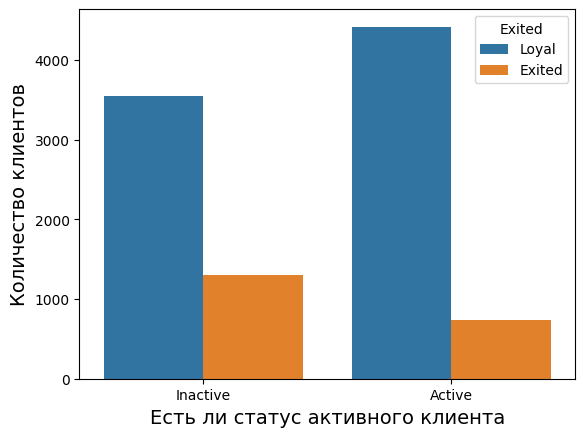

In [116]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')

churn_data = churn_data.drop(['RowNumber'], axis=1)

import seaborn as sns
import matplotlib.pyplot as plt

churn_data['Exited'] = churn_data['Exited'].astype('category')
churn_data['Exited'] = churn_data['Exited'].cat.rename_categories({
    1 : 'Exited',
    0 : 'Loyal'
})

churn_data['IsActiveMember'] = churn_data['IsActiveMember'].astype('category')
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].cat.rename_categories({
    1 : 'Active',
    0 : 'Inactive'
})

grouped_row = churn_data.groupby(['IsActiveMember', 'Exited'], as_index=False)['CustomerId'].count()

barplot = sns.barplot(
    data=grouped_row,
    x='IsActiveMember',
    y='CustomerId',
    hue='Exited',
    orient='v'
)
barplot.set_xlabel('Есть ли статус активного клиента', fontsize=14);
barplot.set_ylabel('Количество клиентов', fontsize=14);

*Выводы:* по графику видно, что наличие статуса активного клиента уменьшает отток клиентов. Соотношение клиентов без статуса активный: ушедших клиентов примерно 30%, а у клиентов со статусом активный ушедших примерно 20%.
Можно посоветовать для неативных клиентов повышать их активность: проводить льготные программы, повышать ставки по депозитам, увеличивать процент кэшбека и т.д. 

*9.9. В какой стране доля ушедших клиентов больше?*

In [117]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')

churn_data = churn_data.drop(['RowNumber'], axis=1)

import plotly.express as px

churn_data_geo = churn_data.groupby('Geography', as_index=False)['Exited'].mean()

fig = px.choropleth(
    data_frame=churn_data_geo,
    locations="Geography",
    locationmode = "country names",
    color="Exited",
    range_color=[0, 0.4],
    title='Средний отток клиентов по странам',
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds'
)

fig.show()

*Вывод:* По графику видно, что в Германии отток клиентов выше в 2 раза, а в Испании и Франции отток клиентов примерно одинаковый. Возможно это связано с большим количеством разнообразных банков в Германии, что дает большие возможности выбора пользователям банков.

*9.10. Тепловая карта с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.*

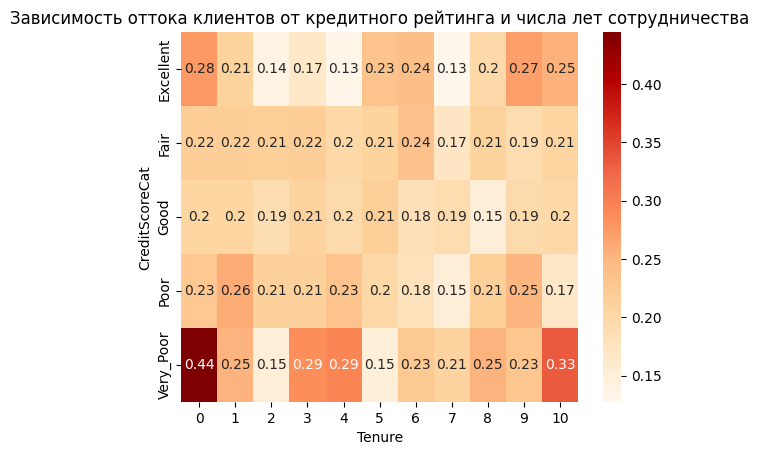

In [118]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')

churn_data = churn_data.drop(['RowNumber'], axis=1)

import matplotlib.pyplot as plt
import seaborn as sns

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot1=churn_data.pivot_table(
values='Exited',
index='CreditScoreCat',
columns='Tenure',
aggfunc='mean')

fig = plt.figure()
ax = sns.heatmap(data=pivot1, annot=True, cmap='OrRd');
ax.set_title('Зависимость оттока клиентов от кредитного рейтинга и числа лет сотрудничества');

*Вывод:* самый большой отток клиентов с кредитным рейтингом Very_Poor, которые пользуются услугами банка меньше года и 10 лет.
Так же стоит обратить внимание на клиентов рейтинга Very_Poor, которые пользуются услугами банка 3 и 4 года, и клиентов с кредитным рейтингом Excellent, которые пользуютсу услугами первый год и 9-10 год.
